<a href="https://colab.research.google.com/github/ahmedmoustafa/notebooks/blob/master/Medulloblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medulloblastoma Gene Expression

Differential gene expression analysis of the medulloblastoma microarray dataset [GSE37418](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE37418) using R. The dataset was part of the Robinson et al 2012 study (PMID: [22722829](https://pubmed.ncbi.nlm.nih.gov/22722829/)).

In [1]:
library(tidyverse)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




Loading the expression data

In [2]:
e1 = read_tsv("https://github.com/ahmedmoustafa/notebooks/raw/master/data/GSE37418_expression.tsv.gz")
glimpse(e1)

Parsed with column specification:
cols(
  gene = col_character(),
  sample = col_character(),
  expression = col_double()
)



Rows: 4,100,625
Columns: 3
$ gene       <chr> "1007_s_at", "1053_at", "117_at", "121_at", "1255_g_at", "…
$ sample     <chr> "GSM918578", "GSM918578", "GSM918578", "GSM918578", "GSM91…
$ expression <dbl> 7.595940, 6.144400, 4.824306, 5.670915, 4.141546, 5.489351…


Loading the meta data

In [3]:
meta = read_tsv("https://raw.githubusercontent.com/ahmedmoustafa/notebooks/master/data/GSE37418_metadata.tsv")
glimpse(meta)

Parsed with column specification:
cols(
  sample = col_character(),
  group = col_character(),
  age = col_double(),
  sex = col_character(),
  ethnic = col_character(),
  stage = col_character()
)



Rows: 76
Columns: 6
$ sample <chr> "GSM918578", "GSM918579", "GSM918580", "GSM918581", "GSM918582…
$ group  <chr> "G4", "G4", "WNT", "G4", "SHH", "G4", "G4", "G4", "G3", "G3", …
$ age    <dbl> 8.3, 8.3, 6.5, 9.2, 8.5, 8.1, 8.7, 9.0, 10.8, 9.7, 4.9, 5.2, 8…
$ sex    <chr> "Male", "Male", "Female", "Male", "Male", "Female", "Male", "F…
$ ethnic <chr> "White", "Black", "White", "White", "Asian", "White", "White",…
$ stage  <chr> "stMB-CL", "stMB-CL", "stMB-CL", "stMB-CL", "stMB-DN", "stMB-C…


In [4]:
e2 = e1 %>% inner_join(meta)
head(e2)

Joining, by = "sample"



gene,sample,expression,group,age,sex,ethnic,stage
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1007_s_at,GSM918578,7.595940,G4,8.3,Male,White,stMB-CL
1053_at,GSM918578,6.144400,G4,8.3,Male,White,stMB-CL
117_at,GSM918578,4.824306,G4,8.3,Male,White,stMB-CL
121_at,GSM918578,5.670915,G4,8.3,Male,White,stMB-CL
1255_g_at,GSM918578,4.141546,G4,8.3,Male,White,stMB-CL
1294_at,GSM918578,5.489351,G4,8.3,Male,White,stMB-CL


Excluding sample GSM918628 which was identified as an outlier.

In [5]:
e3 = e2 %>% filter(sample != "GSM918628")
head(e3)

gene,sample,expression,group,age,sex,ethnic,stage
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1007_s_at,GSM918578,7.595940,G4,8.3,Male,White,stMB-CL
1053_at,GSM918578,6.144400,G4,8.3,Male,White,stMB-CL
117_at,GSM918578,4.824306,G4,8.3,Male,White,stMB-CL
121_at,GSM918578,5.670915,G4,8.3,Male,White,stMB-CL
1255_g_at,GSM918578,4.141546,G4,8.3,Male,White,stMB-CL
1294_at,GSM918578,5.489351,G4,8.3,Male,White,stMB-CL


In [6]:
e4 = e3 %>%
  group_by(gene) %>%
  summarise(pvalue = broom::tidy(kruskal.test(formula = expression ~ group))$p.value)
head(e4)

gene,pvalue
<chr>,<dbl>
1007_s_at,0.033864164
1053_at,0.313549552
117_at,0.395320574
121_at,0.234278432
1255_g_at,0.005278409
1294_at,0.009325998


In [7]:
e5 = e4 %>% mutate (adjusted.pvalue = p.adjust(pvalue))
head(e5)

gene,pvalue,adjusted.pvalue
<chr>,<dbl>,<dbl>
1007_s_at,0.033864164,1
1053_at,0.313549552,1
117_at,0.395320574,1
121_at,0.234278432,1
1255_g_at,0.005278409,1
1294_at,0.009325998,1


In [8]:
sig = e5 %>% filter(adjusted.pvalue <= 1e-2) %>% select(gene)
head(sig)
nrow(sig)

gene
<chr>
1552712_a_at
1552953_a_at
1553034_at
1553181_at
1553292_s_at
1553357_at


[1] 1341

In [9]:
e6 = e3 %>% inner_join(sig)
head(e6)

Joining, by = "gene"



gene,sample,expression,group,age,sex,ethnic,stage
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1552712_a_at,GSM918578,6.323283,G4,8.3,Male,White,stMB-CL
1552953_a_at,GSM918578,7.009590,G4,8.3,Male,White,stMB-CL
1553034_at,GSM918578,6.720341,G4,8.3,Male,White,stMB-CL
1553181_at,GSM918578,5.857933,G4,8.3,Male,White,stMB-CL
1553292_s_at,GSM918578,7.400559,G4,8.3,Male,White,stMB-CL
1553357_at,GSM918578,4.812184,G4,8.3,Male,White,stMB-CL


In [10]:
m1 = e6 %>% dcast (gene ~ sample, value.var = "expression")
head(m1)
dim(m1)

,gene,GSM918578,GSM918579,GSM918580,GSM918581,GSM918582,GSM918583,GSM918584,GSM918585,GSM918586,⋯,GSM918644,GSM918645,GSM918646,GSM918647,GSM918648,GSM918649,GSM918650,GSM918651,GSM918652,GSM918653
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1552712_a_at,6.323283,4.970508,6.987490,6.062622,7.305658,5.810243,6.050205,6.476049,5.516247,⋯,6.333812,5.191289,6.382662,6.328651,6.797159,6.778899,5.666080,8.408516,5.907811,6.124246
2,1552953_a_at,7.009590,7.997495,5.961005,7.482738,5.606170,7.647738,7.752292,8.223010,6.621938,⋯,6.196851,8.831025,8.126577,8.285967,7.785097,6.365267,7.803598,6.201725,8.357165,7.590094
3,1553034_at,6.720341,5.340418,4.462454,7.174495,5.566052,6.930397,6.233430,6.097849,6.118318,⋯,5.459586,6.858670,6.345461,6.931960,5.449750,5.413876,6.979517,5.863631,6.464277,5.645093
4,1553181_at,5.857933,6.020295,3.206803,5.282188,4.868303,5.485626,5.718343,5.459160,5.144000,⋯,4.987708,5.779199,4.653008,5.276583,4.758749,4.573679,5.685279,4.667206,5.718343,7.031565
5,1553292_s_at,7.400559,7.915238,6.893352,8.174844,6.761689,7.485155,7.776577,7.942149,7.421656,⋯,7.128416,8.072498,8.699382,8.425385,8.119994,6.967815,7.478791,7.243012,8.232121,6.920277
6,1553357_at,4.812184,5.270946,3.314186,4.387014,3.198673,4.897840,5.192401,4.473922,4.499810,⋯,5.289277,5.271460,5.454894,5.039546,4.682131,3.642836,5.596569,4.589041,4.255613,4.475061


[1] 1341   76

In [11]:
m2 = as.matrix(m1[, -1])
row.names(m2) = m1[, 1]
head(m2)

,GSM918578,GSM918579,GSM918580,GSM918581,GSM918582,GSM918583,GSM918584,GSM918585,GSM918586,GSM918587,⋯,GSM918644,GSM918645,GSM918646,GSM918647,GSM918648,GSM918649,GSM918650,GSM918651,GSM918652,GSM918653
1552712_a_at,6.323283,4.970508,6.987490,6.062622,7.305658,5.810243,6.050205,6.476049,5.516247,5.898801,⋯,6.333812,5.191289,6.382662,6.328651,6.797159,6.778899,5.666080,8.408516,5.907811,6.124246
1552953_a_at,7.009590,7.997495,5.961005,7.482738,5.606170,7.647738,7.752292,8.223010,6.621938,7.515235,⋯,6.196851,8.831025,8.126577,8.285967,7.785097,6.365267,7.803598,6.201725,8.357165,7.590094
1553034_at,6.720341,5.340418,4.462454,7.174495,5.566052,6.930397,6.233430,6.097849,6.118318,5.408964,⋯,5.459586,6.858670,6.345461,6.931960,5.449750,5.413876,6.979517,5.863631,6.464277,5.645093
1553181_at,5.857933,6.020295,3.206803,5.282188,4.868303,5.485626,5.718343,5.459160,5.144000,5.173321,⋯,4.987708,5.779199,4.653008,5.276583,4.758749,4.573679,5.685279,4.667206,5.718343,7.031565
1553292_s_at,7.400559,7.915238,6.893352,8.174844,6.761689,7.485155,7.776577,7.942149,7.421656,7.067405,⋯,7.128416,8.072498,8.699382,8.425385,8.119994,6.967815,7.478791,7.243012,8.232121,6.920277
1553357_at,4.812184,5.270946,3.314186,4.387014,3.198673,4.897840,5.192401,4.473922,4.499810,4.441474,⋯,5.289277,5.271460,5.454894,5.039546,4.682131,3.642836,5.596569,4.589041,4.255613,4.475061


In [0]:
row_clust = hclust(as.dist(1-cor(t(m2))))
ordered_genes = rownames(m2)[row_clust$order]
col_clust = hclust(as.dist(1-cor(m2)))
ordered_samples = colnames(m2)[col_clust$order]

In [13]:
e7 = e6 %>% mutate (sample = factor(sample, levels = ordered_samples), gene = factor(gene, levels = ordered_genes))
head(e7)

gene,sample,expression,group,age,sex,ethnic,stage
<fct>,<fct>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1552712_a_at,GSM918578,6.323283,G4,8.3,Male,White,stMB-CL
1552953_a_at,GSM918578,7.009590,G4,8.3,Male,White,stMB-CL
1553034_at,GSM918578,6.720341,G4,8.3,Male,White,stMB-CL
1553181_at,GSM918578,5.857933,G4,8.3,Male,White,stMB-CL
1553292_s_at,GSM918578,7.400559,G4,8.3,Male,White,stMB-CL
1553357_at,GSM918578,4.812184,G4,8.3,Male,White,stMB-CL


In [14]:
e8 = e7 %>% group_by(gene) %>% mutate(scaled.expression = scale(expression))
head(e8)

gene,sample,expression,group,age,sex,ethnic,stage,scaled.expression
<fct>,<fct>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1552712_a_at,GSM918578,6.323283,G4,8.3,Male,White,stMB-CL,0.31664097
1552953_a_at,GSM918578,7.009590,G4,8.3,Male,White,stMB-CL,0.06034242
1553034_at,GSM918578,6.720341,G4,8.3,Male,White,stMB-CL,0.73077953
1553181_at,GSM918578,5.857933,G4,8.3,Male,White,stMB-CL,1.16585179
1553292_s_at,GSM918578,7.400559,G4,8.3,Male,White,stMB-CL,-0.27878205
1553357_at,GSM918578,4.812184,G4,8.3,Male,White,stMB-CL,0.38879765


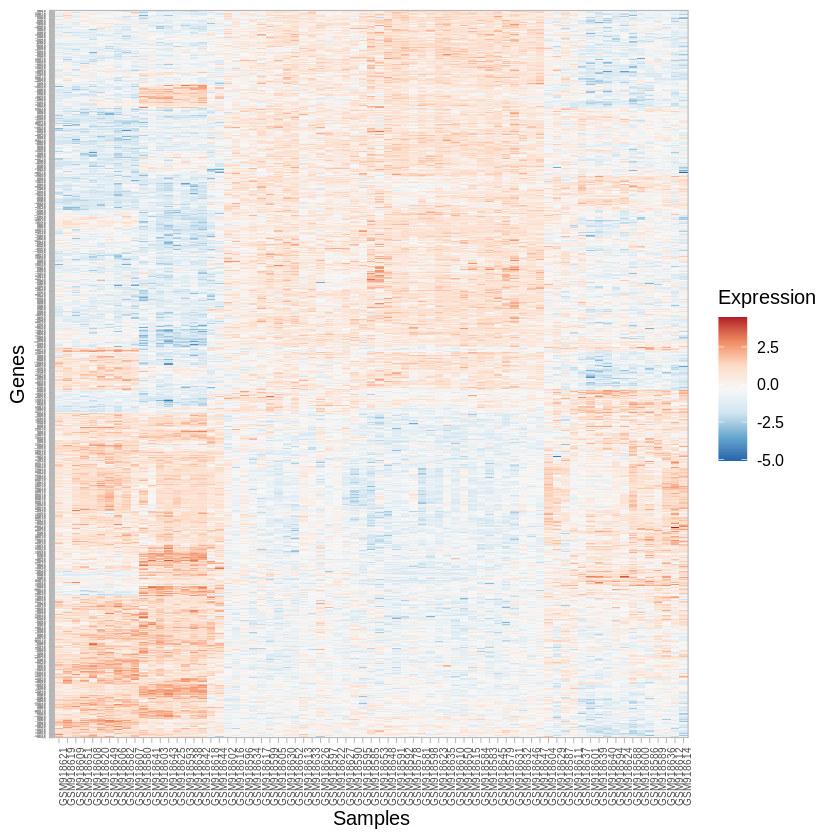

In [15]:
ggplot(e8) +
  geom_tile(aes(x = sample, y = gene, fill = scaled.expression)) +
  theme_light(base_size = 12) +
  scale_fill_distiller(palette = "RdBu") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 6)) +
  theme(axis.text.y = element_text(size = 1)) +
  labs (x = "Samples", y = "Genes", fill = "Expression")